In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
# from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# print(type(x_train))
print(x_train[0].shape)
# print(x_train[0])
# print(y_train[0].shape)
print(y_train[0])

# check dimensions
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)
print("x_test original shape", x_test.shape)
print("y_test original shape", y_test.shape)

(28, 28)
5
x_train original shape (60000, 28, 28)
y_train original shape (60000,)
x_test original shape (10000, 28, 28)
y_test original shape (10000,)


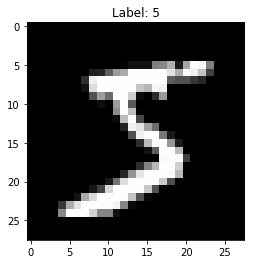

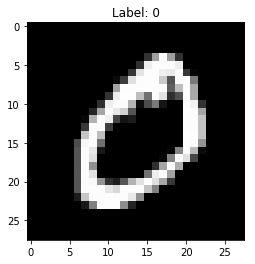

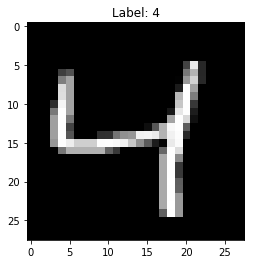

In [3]:
for i in range(3):
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Label: " + str(y_train[i]))
    plt.show()

In [4]:
# flatten -- one input
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# check dimensions
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
# convert labels to one-hot
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

# check labels
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
# model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [8]:
model.fit(x_train, y_train,
          batch_size=128, epochs=10,verbose=1,
          # show_accuracy=True, verbose=1)
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.2189 - acc: 0.9350 - val_loss: 0.0992 - val_acc: 0.9689
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0795 - acc: 0.9752 - val_loss: 0.0748 - val_acc: 0.9778
Epoch 3/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0503 - acc: 0.9841 - val_loss: 0.0664 - val_acc: 0.9793
Epoch 4/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0352 - acc: 0.9888 - val_loss: 0.0676 - val_acc: 0.9806
Epoch 5/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0281 - acc: 0.9903 - val_loss: 0.0672 - val_acc: 0.9821
Epoch 6/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0211 - acc: 0.9930 - val_loss: 0.0796 - val_acc: 0.9776
Epoch 7/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0189 - acc: 0.9937 - val_loss: 0.0937 - 

In [9]:
# score = model.evaluate(x_test, y_test)
#                        # show_accuracy=True, verbose=0)
# print(score)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

In [10]:
predicted_classes = model.predict_classes(x_test)
# correct_indices = np.nonzero(predicted_classes == y_test)[0]
# incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

# plt.figure()
# for i, correct in enumerate(correct_indices[:9]):
#     plt.subplot(3,3,i+1)
#     plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
#     plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
#     plt.show()

In [11]:
print(predicted_classes[0])

7


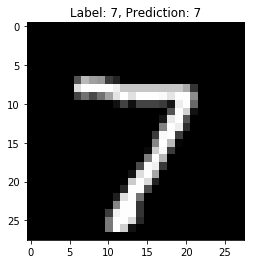

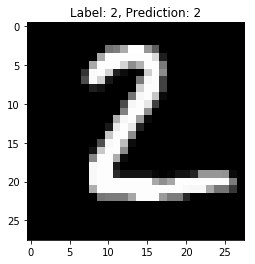

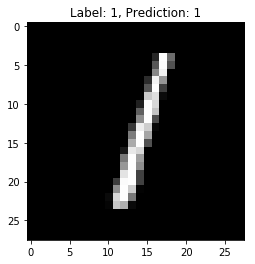

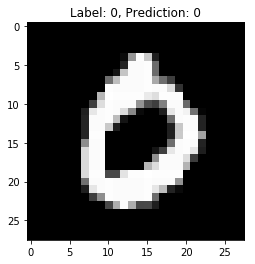

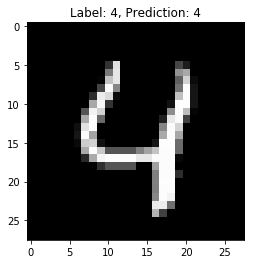

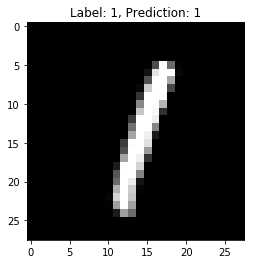

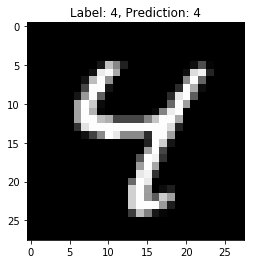

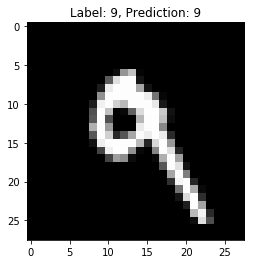

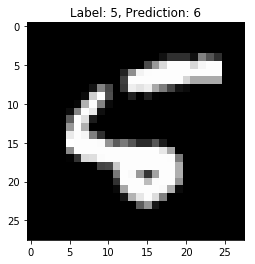

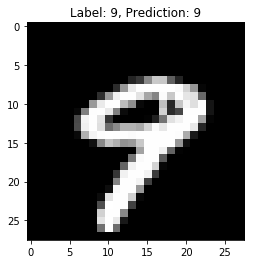

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
for i in range(10):
    plt.imshow(x_test[i], cmap='gray', interpolation='none')
    plt.title("Label: " + str(y_test[i]) + ", Prediction: " + str(predicted_classes[i]))
    plt.show()